# Explore here

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt

file_path = "../data/raw/AB_NYC_2019.csv"
data = pd.read_csv(file_path)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [61]:
columns_to_drop = "host_name", "id", "name", "host_id", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count" 
data = data.drop(columns_to_drop, axis=1)



x = data.drop(["price"], axis=1)
y = data.loc[:, ["price"]]

data

KeyError: "[('host_name', 'id', 'name', 'host_id', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count')] not found in axis"

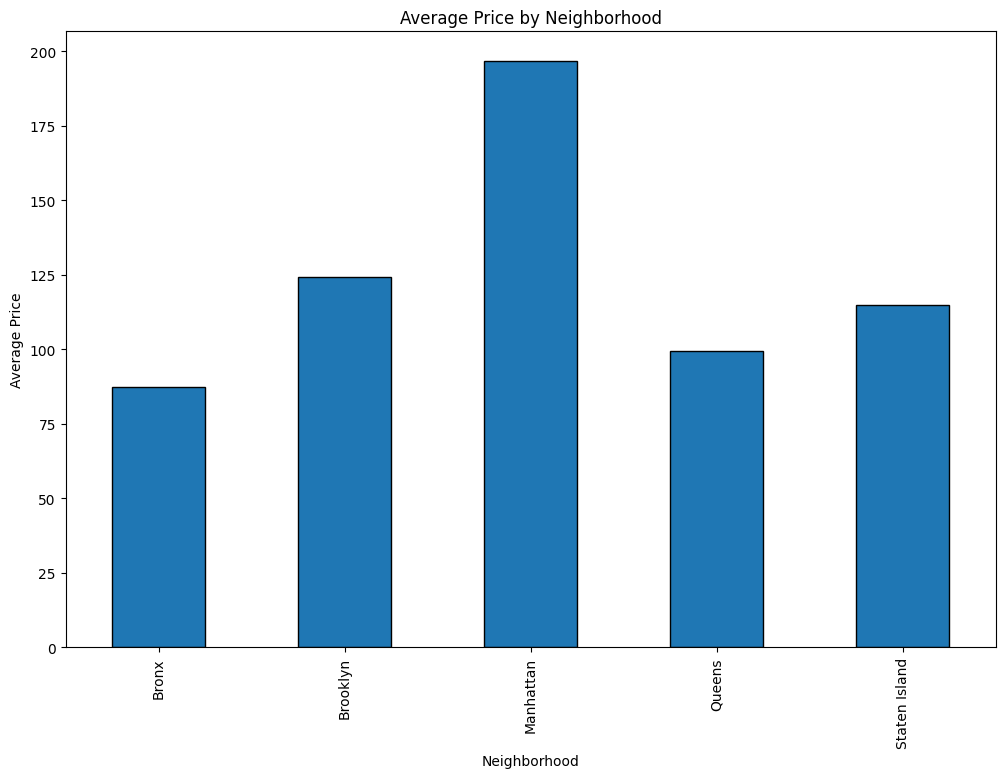

In [39]:
# Group by neighborhood and calculate the average price
average_price_by_neighborhood = data.groupby('neighbourhood_group')['price'].mean()

# Plot bar chart for the average price by neighborhood
plt.figure(figsize=(12, 8))
average_price_by_neighborhood.plot(kind='bar', edgecolor='black')

# Add title and labels
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')

# Show the plot
plt.show()